In [35]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
from math import exp,sqrt
import collections
from scipy.stats import mode
import matplotlib.pyplot as plt

Question 1

In [2]:
data_train = pd.read_excel('Asssignment4_Data.xlsx', sheet_name='Train')
data_test = pd.read_excel('Asssignment4_Data.xlsx', sheet_name='Test')
x_train = data_train.drop('Construction type', axis = 1)
y_train = data_train['Construction type']
x_test = data_test.drop('Construction type', axis=1)
y_test = data_test['Construction type']


In [3]:
classes = collections.Counter(y_train)
predict_prob = []
for i in classes:
    predict_prob.append(classes[i]/y_train.shape[0])

print(predict_prob[0])


0.35


Mean and variance for Apartment features

In [4]:
mean_local_price_a = 7.3327
variance_local_price_a = 11.2075
mean_land_area_a = 6.1039
variane_land_area_a = 9.1010
mean_living_area_a = 1.5050
variance_living_area_a = 0.4249
mean_age_of_house_a = 38.7142
variance_age_of_house_a = 184.7755

Mean and variance for House features

In [5]:
mean_local_price_h = 5.7607
variance_local_price_h = 0.2786
mean_land_area_h = 6.6309
variane_land_area_h = 4.3353
mean_living_area_h = 1.3917
variance_living_area_h = 0.0389
mean_age_of_house_h = 34.2857
variance_age_of_house_h = 138.7755

Mean and variance for Condo features

In [6]:
mean_local_price_c = 7.4159
variance_local_price_c = 17.7197
mean_land_area_c = 6.0247
variane_land_area_c = 5.3966
mean_living_area_c = 1.5533
variance_living_area_c = 0.7106
mean_age_of_house_c = 39.6667
variance_age_of_house_c = 162.2222

In [7]:
def condition_probability(mean,variance,value):
    return 1/sqrt(2*3.14)*sqrt(variance) * exp(-(value-mean)**2/2*variance)

In [39]:
print(condition_probability(mean_age_of_house_a,variance_age_of_house_a,44))
print(condition_probability(mean_age_of_house_a,variance_age_of_house_a,31))
print(condition_probability(mean_age_of_house_a,variance_age_of_house_a,30))
print(condition_probability(mean_age_of_house_h,variance_age_of_house_h,3))
print(condition_probability(mean_age_of_house_h,variance_age_of_house_h,48))
print(condition_probability(mean_land_area_a, variane_land_area_a,6.7265))
print(condition_probability(mean_land_area_a, variane_land_area_a,7.3262))
print(condition_probability(mean_land_area_a, variane_land_area_a,5))
print(condition_probability(mean_land_area_h, variane_land_area_h,8))
print(condition_probability(mean_land_area_h, variane_land_area_h,9.15))
print(condition_probability(mean_local_price_a, variance_local_price_a, 6.0931))
print(condition_probability(mean_local_price_a, variance_local_price_a, 9.1416))
print(condition_probability(mean_local_price_a, variance_local_price_a, 12))
print(condition_probability(mean_local_price_h, variance_local_price_h, 8.3607))
print(condition_probability(mean_local_price_h, variance_local_price_h, 8.14))
print(condition_probability(mean_living_area_a, variance_living_area_a, 1.652))
print(condition_probability(mean_living_area_a, variance_living_area_a, 1.831))
print(condition_probability(mean_living_area_a, variance_living_area_a, 1.2))
print(condition_probability(mean_living_area_h, variance_living_area_h, 1.777))
print(condition_probability(mean_living_area_h, variance_living_area_h, 1.504))

0.0
0.0
0.0
0.0
0.0
0.20630355748489035
0.0013427728398229166
0.0047022679478919875
0.014286957795659829
8.821502538218535e-07
0.00024331312392151345
1.4537542222017416e-08
1.2920985481772973e-53
0.0821390201902666
0.09572642075175669
0.2589224874781608
0.2543067553615442
0.2550236820323733
0.07847674223376616
0.07868436618857405


In [40]:
apartment_24=0.104030659*(1/7)*0.120216067*0.554379673*(3/7)*(2/7)*(3/7)*0.025466629*0.35
house_24=0.590401327*(1/7)*0.177228437*0.887548309*(2/7)*(4/7)*(5/7)*0.023426879*0.35
condo_24=0.083027579*(1/6)*0.150918887*0.429557952*(4/6)*(4/6)*(5/6)*0.027246956*0.3
predict = max(apartment_24, house_24, condo_24)
if (predict==apartment_24):
    print("Classification  Apartment")
if (predict==house_24):
    print("Classification  house")
if (predict==condo_24):
    print("Classification   condo")

Classification  house


In [41]:
apartment_25=0.107611*(1/7)*0.103362287*0.566593641*(2/7)*(1/7)*(2/7)*0.001410199*0.35
house_25=0.000115*(1/7)*0.147384458*1.630411282*(2/7)*(1/7)*(1/7)*0.001525864*0.35
condo_25=0.085454*(1/6)*0.11599033*0.431400867*(2/6)*(1/6)*(1/6)*0.000904816*0.3
predict = max(apartment_25, house_25, condo_25)
if (predict==apartment_25):
    print("Classification  Apartment")
if (predict==house_25):
    print("Classification  house")
if (predict==condo_25):
    print("Classification   condo")

Classification  Apartment


In [42]:
apartment_26=0.105957*(5/7)*0.079090759*0.525855981*(2/7)*(2/7)*(3/7)*0.022246397*0.35
house_26=2.13285E-05*(6/7)*0.094728838*0.364487546*(2/7)*(2/7)*(5/7)*0.017539795*0.35
condo_26=0.084718*(4/6)*0.073745078*0.419528702*(2/6)*(1/6)*(5/6)*0.02392215*0.3
predict = max(apartment_26, house_26, condo_26)
if (predict==apartment_26):
    print("Classification  Apartment")
if (predict==house_26):
    print("Classification  house")
if (predict==condo_26):
    print("Classification   condo")

Classification  Apartment


In [43]:
apartment_27=0.097351*(1/7)*0.114112878*0.509005858*(1/7)*(1/7)*(2/7)*0.023668419*0.35
house_27=1.61737E-08*(1/7)*0.169110442*0.223055901*(1/7)*(1/7)*(1/7)*0.030324994*0.35
condo_27=0.0806639*(1/6)*0.137549194*0.412921903*(1/6)*(1/6)*(1/6)*0.02357649*0.3
predict = max(apartment_27, house_27, condo_27)
if (predict==apartment_27):
    print("Classification  Apartment")
if (predict==house_27):
    print("Classification  house")
if (predict==condo_27):
    print("Classification   condo")

Classification  Apartment


In [44]:
apartment_28=0.04796*(1/7)*0.115603615*0.51585397*(2/7)*(2/7)*(3/7)*0.022783507*0.35
house_28=6.89004E-27*(1/7)*0.136374301*1.24923579*(2/7)*(4/7)*(5/7)*0.02962415*0.35
condo_28=0.052782*(1/6)*0.144561953*0.401522336*(2/6)*(4/6)*(5/6)*0.022492029*.3
predict = max(apartment_28, house_28, condo_28)
if (predict==apartment_28):
    print("Classification  Apartment")
if (predict==house_28):
    print("Classification  house")
if (predict==condo_28):
    print("Classification   condo")

Classification   condo


Question 2

In [9]:
def train(x_train, x_test, y_train,depth):
    model = DecisionTreeClassifier(criterion= "entropy", random_state= 100, max_depth=depth,min_samples_leaf=5)
    model.fit(x_train,y_train)
    return model

In [10]:
def predict(testing_data, model):
    y_predictions = model.predict(testing_data)
    return y_predictions

In [11]:
def accuracy_classification(y_test, y_pred):
    return (accuracy_score(y_test, y_pred)*100), classification_report(y_test, y_pred, zero_division=0)

Accuracy =  20.0
Report =                precision    recall  f1-score   support

   Apartment       0.00      0.00      0.00         3
       Condo       0.00      0.00      0.00         0
       House       0.33      0.50      0.40         2

    accuracy                           0.20         5
   macro avg       0.11      0.17      0.13         5
weighted avg       0.13      0.20      0.16         5



[Text(0.5, 0.8333333333333334, 'X[8] <= 36.0\nentropy = 1.581\nsamples = 20\nvalue = [7, 6, 7]'),
 Text(0.25, 0.5, 'X[4] <= 1.494\nentropy = 1.371\nsamples = 10\nvalue = [2, 2, 6]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.971\nsamples = 5\nvalue = [2, 0, 3]'),
 Text(0.75, 0.5, 'X[0] <= 5.5\nentropy = 1.361\nsamples = 10\nvalue = [5, 4, 1]'),
 Text(0.625, 0.16666666666666666, 'entropy = 1.371\nsamples = 5\nvalue = [3, 1, 1]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.971\nsamples = 5\nvalue = [2, 3, 0]')]

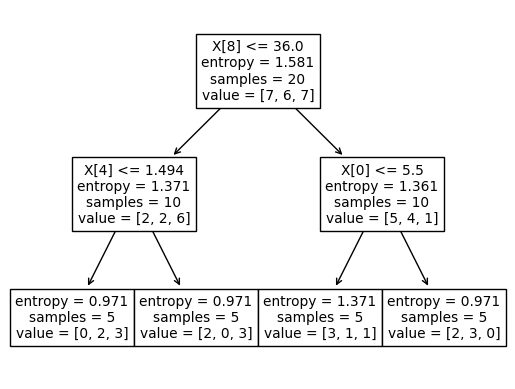

In [14]:
model = train(x_train,x_test,y_train,10)
y_prediction = predict(x_test, model)
accuracy, report = accuracy_classification(y_test, y_prediction)
print("Accuracy = ", accuracy)
print("Report = ", report)
tree.plot_tree(model)

C:\Users\anubh\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\anubh\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\anubh\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\anubh\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\anubh\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted w

Accuracy =  20.0
Report =                precision    recall  f1-score   support

   Apartment       0.00      0.00      0.00         3
       Condo       0.00      0.00      0.00         0
       House       0.33      0.50      0.40         2

    accuracy                           0.20         5
   macro avg       0.11      0.17      0.13         5
weighted avg       0.13      0.20      0.16         5

Accuracy =  20.0
Report =                precision    recall  f1-score   support

   Apartment       0.00      0.00      0.00         3
       Condo       0.00      0.00      0.00         0
       House       0.33      0.50      0.40         2

    accuracy                           0.20         5
   macro avg       0.11      0.17      0.13         5
weighted avg       0.13      0.20      0.16         5

Accuracy =  20.0
Report =                precision    recall  f1-score   support

   Apartment       0.00      0.00      0.00         3
       Condo       0.00      0.00      0.00     

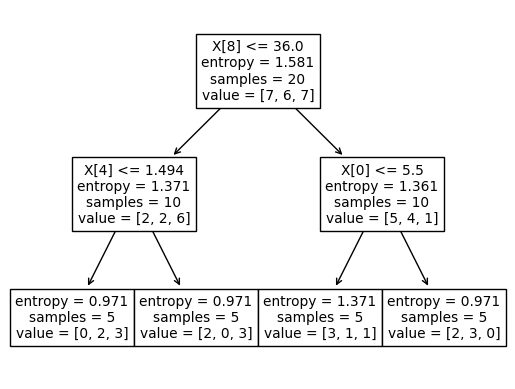

In [37]:
for i in [5,7,9,11,15,17]:
    model = train(x_train,x_test,y_train,i)
    y_prediction = predict(x_test, model)
    accuracy, report = accuracy_classification(y_test, y_prediction)
    print("Accuracy = ", accuracy)
    print("Report = ", report)
    tree.plot_tree(model)

Question 3

In [16]:
def distance(num_1, num_2):
    return np.sqrt(np.sum((num_1-num_2)**2))

In [31]:
def predict_k(x_train, y , x_input, k):
    labels = []
    for item in x_input:
        pda = []
        for j in range(len(x_train)): 
            distances = distance(x_train.iloc[j,:].values , item) 
            pda.append(distances) 
        pda = np.array(pda) 
        dist = np.argsort(pda)[:k] 
        label = y[dist]
        l = mode(label) 
        l = l.mode[0]
        labels.append(l)
    return labels

1 Accuracy:  0.6
2 Accuracy:  0.6
3 Accuracy:  0.2
4 Accuracy:  0.2
5 Accuracy:  0.4


C:\Users\anubh\AppData\Local\Temp\ipykernel_2244\575048954.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  l = mode(label)
C:\Users\anubh\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\anubh\AppData\Local\Temp\ipykernel_2244\575048954.py:11: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas

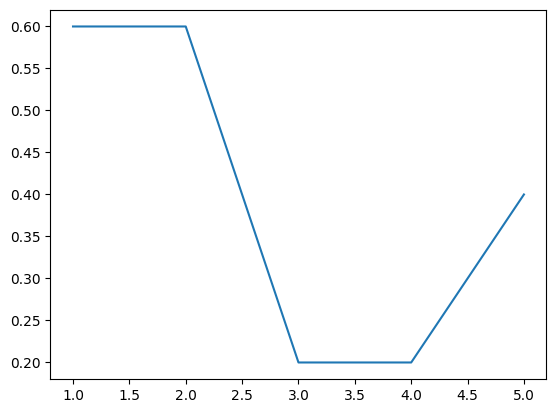

In [36]:
x_test = np.array(x_test)
accuracy_values = []
k_values = range(1,6)
for i in range(1,6):
    y_prediction = predict_k(x_train, y_train,x_test, i)
    print(i, "Accuracy: ", accuracy_score(y_test, y_prediction))
    accuracy_values.append(accuracy_score(y_test,y_prediction))

plt.plot(k_values, accuracy_values)


2.)
1.) a.) Accuracy = 0.20
    b.) Accuracy = 0.20

3.) Restricting the depth can increase accuracy. Accuracy keeps fluctuating whith different accuracy.
4.) This is because this prevents oveerfitting.


*** The report is included in Assignment 4.pdf ***